In [26]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

In [9]:
m1,m2,m3, G = smp.symbols(r"m1,m2,m3, G", positive = True, real = True)

from sympy.physics.mechanics import dynamicsymbols , init_vprinting # Se utilizan estas funciones para tener notacion de Newton para las derivadas temporales y se generan 
                                                                    # las funciones con dependencia implicita a t

init_vprinting()

t = smp.Symbol("t", positive = True) # Tiempo
x1,y1,z1 , x2,y2,z2 , x3,y3,z3 = dynamicsymbols(r"x_1,y_1,z_1 , x_2,y_2,z_2 , x_3,y_3,z_3") 

dx1 = smp.diff(x1)
dy1 = smp.diff(y1)
dz1 = smp.diff(z1)

dx2 = smp.diff(x2)
dy2 = smp.diff(y2)
dz2 = smp.diff(z2)

dx3 = smp.diff(x3)
dy3 = smp.diff(y3)
dz3 = smp.diff(z3)

px1,py1,pz1 , px2,py2,pz2 , px3,py3,pz3 = smp.symbols(r"p_{x_1},p_{y_1},p_{z_1} , p_{x_2},p_{y_2},p_{z_2} , p_{x_3},p_{y_3},p_{z_3} ", real = True)

In [3]:
r1 = smp.Matrix([x1,y1,z1])
r2 = smp.Matrix([x2,y2,z2])
r3 = smp.Matrix([x3,y3,z3])

rr1 = r1.dot(r1)
rr2 = r2.dot(r2)
rr3 = r3.dot(r3)

v1 = smp.diff(r1)
v2 = smp.diff(r2)
v3 = smp.diff(r3)

vv1 = v1.dot(v1)
vv2 = v2.dot(v2)
vv3 = v3.dot(v3)

T = smp.Rational(1,2)*m1*vv1 + smp.Rational(1,2)*m2*vv2 + smp.Rational(1,2)*m3*vv3
V = -G*(m1*m2/(rr1-rr2)+m1*m3/(rr1-rr3)+m3*m2/(rr3-rr2))

L = T - V

Obteniendo el Hamiltoneano del sistema

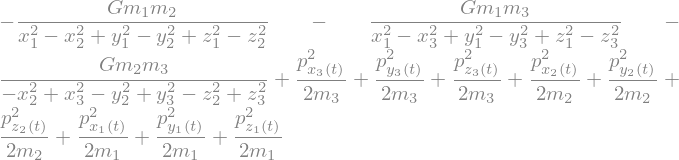

In [4]:
from lagrange_a_hamilton import cambio_L_H
coordenadas_generalizadas = [x1,y1,z1 , x2,y2,z2 , x3,y3,z3]

H, s_momentos_generalizados, momentos_generalizados = cambio_L_H(L,coordenadas_generalizadas)
H

In [5]:
ecuaciones_dq = []
for i in range(len(coordenadas_generalizadas)):
    aux = smp.diff(H,s_momentos_generalizados[i])
    ecuaciones_dq.append(aux)

qs = [x1,y1,z1 , x2,y2,z2 , x3,y3,z3]

ecuaciones_dp = []
for i in range(len(s_momentos_generalizados)):
    aux = -smp.diff(H, qs[i])
    ecuaciones_dp.append(aux)

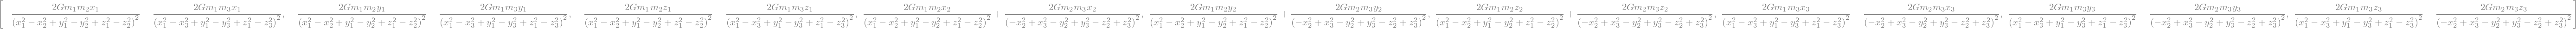

In [6]:
ecuaciones_dp

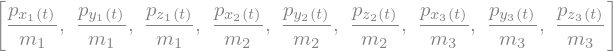

In [7]:
ecuaciones_dq

In [11]:
s_momentos_generalizados

Convirtiendo las expresiones anteriores a expresiones numericas

In [58]:
########################
dq1x_n = smp.lambdify([m1,s_momentos_generalizados[0]],ecuaciones_dq[0])
dq1y_n = smp.lambdify([m1,s_momentos_generalizados[1]],ecuaciones_dq[1])
dq1z_n = smp.lambdify([m1,s_momentos_generalizados[2]],ecuaciones_dq[2])

dp1x_n = smp.lambdify([G,m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp[0])
dp1y_n = smp.lambdify([G,m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp[1])
dp1z_n = smp.lambdify([G,m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp[2])

########################
dq2x_n = smp.lambdify([m2,s_momentos_generalizados[3]],ecuaciones_dq[3])
dq2y_n = smp.lambdify([m2,s_momentos_generalizados[4]],ecuaciones_dq[4])
dq2z_n = smp.lambdify([m2,s_momentos_generalizados[5]],ecuaciones_dq[5])

dp2x_n = smp.lambdify([G,m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp[3])
dp2y_n = smp.lambdify([G,m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp[4])
dp2z_n = smp.lambdify([G,m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp[5])

#########################
dq3x_n = smp.lambdify([m3,s_momentos_generalizados[6]],ecuaciones_dq[6])
dq3y_n = smp.lambdify([m3,s_momentos_generalizados[7]],ecuaciones_dq[7])
dq3z_n = smp.lambdify([m3,s_momentos_generalizados[8]],ecuaciones_dq[8])

dp3x_n = smp.lambdify([G,m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp[6])
dp3y_n = smp.lambdify([G,m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp[7])
dp3z_n = smp.lambdify([G,m1,m2,m3, x1,y1,z1, x2,y2,z2, x3,y3,z3],ecuaciones_dp[8])





def dSdt(t, S, G, m1, m2, m3):
    # Desempaquetar las variables de estado
    [q1x, q1y, q1z, p1x, p1y, p1z, 
    q2x, q2y, q2z, p2x, p2y, p2z, 
    q3x, q3y, q3z, p3x, p3y, p3z] = S

    # Calcular las derivadas para el cuerpo 1
    dq1x = dq1x_n(m1, p1x)
    dq1y = dq1y_n(m1, p1y)
    dq1z = dq1z_n(m1, p1z)
    dp1x = dp1x_n(G, m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp1y = dp1y_n(G, m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp1z = dp1z_n(G, m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)

    # Calcular las derivadas para el cuerpo 2
    dq2x = dq2x_n(m2, p2x)
    dq2y = dq2y_n(m2, p2y)
    dq2z = dq2z_n(m2, p2z)
    dp2x = dp2x_n(G, m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp2y = dp2y_n(G, m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp2z = dp2z_n(G, m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)

    # Calcular las derivadas para el cuerpo 3
    dq3x = dq3x_n(m3, p3x)
    dq3y = dq3y_n(m3, p3y)
    dq3z = dq3z_n(m3, p3z)
    dp3x = dp3x_n(G, m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp3y = dp3y_n(G, m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)
    dp3z = dp3z_n(G, m1, m2, m3, q1x, q1y, q1z, q2x, q2y, q2z, q3x, q3y, q3z)

    # Retornar la lista de derivadas
    return [dq1x, dq1y, dq1z, dp1x, dp1y, dp1z, 
            dq2x, dq2y, dq2z, dp2x, dp2y, dp2z, 
            dq3x, dq3y, dq3z, dp3x, dp3y, dp3z]



t0 = 0
tf = 100000
n=10000000

t_n = np.linspace(t0,tf,n)

# Condiciones iniciales

q1x0 = 0
q1y0 = 0
q1z0 = 0

p1x0 = 0
p1y0 = 0
p1z0 = 0

#######################

q2x0 = 100000
q2y0 = 0
q2z0 = 0

p2x0 = 20000
p2y0 = 0
p2z0 = 0

#######################

q3x0 = 150000
q3y0 = 1000
q3z0 = 0

p3x0 = 10000
p3y0 = 500
p3z0 = 0

condiciones_iniciales = [q1x0,q1y0,q1z0,p1x0,p1y0,p1z0, q2x0,q2y0,q2z0,p2x0,p2y0,p2z0, q3x0,q3y0,q3z0,p3x0,p3y0,p3z0]

# Argumentos extras
G_n = 8.94*10**-21
m1_n = 100000000000000000000000000000000
m2_n =1000000
m3_n = 10000000000000000
argumentos = [G_n,m1_n,m2_n,m3_n]


from scipy.integrate  import solve_ivp


sol = solve_ivp(dSdt, t_span = (t0,tf), t_eval = t_n, y0 = condiciones_iniciales, args = argumentos)
pos = sol.y

KeyboardInterrupt: 

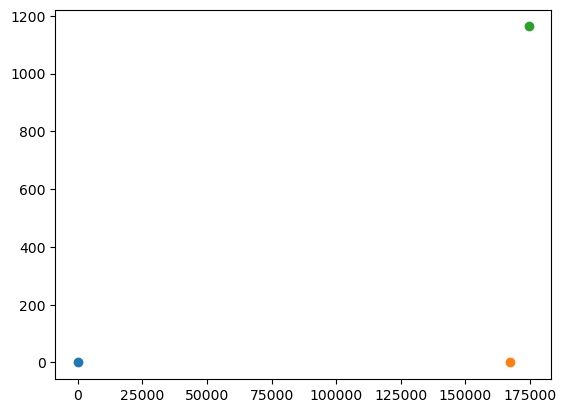

In [59]:
tt=100000

plt.scatter(pos[0][tt],pos[1][tt])
plt.scatter(pos[6][tt],pos[7][tt])
plt.scatter(pos[12][tt],pos[13][tt])

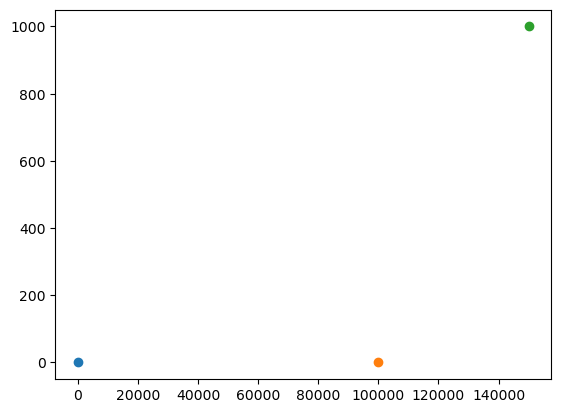

In [60]:
tt=10

plt.scatter(pos[0][tt],pos[1][tt])
plt.scatter(pos[6][tt],pos[7][tt])
plt.scatter(pos[12][tt],pos[13][tt])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

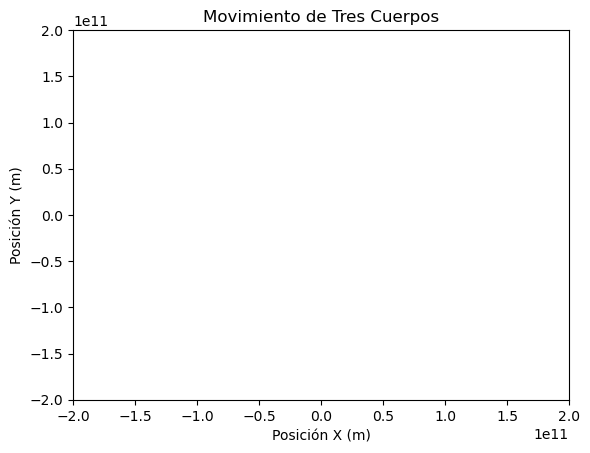

In [62]:
import matplotlib.animation as animation

# Supongamos que 'sol' contiene tus datos de posición
# Extrae las posiciones x, y para los 3 cuerpos
t = sol.t  # Tiempo
x1, y1, z1 = sol.y[0], sol.y[1], sol.y[2]  # Posiciones del cuerpo 1
x2, y2, z2 = sol.y[6], sol.y[7], sol.y[8]  # Posiciones del cuerpo 2
x3, y3, z3 = sol.y[12], sol.y[13], sol.y[14]  # Posiciones del cuerpo 3

# Crear la figura y el eje
fig, ax = plt.subplots()
sc = ax.scatter([], [], c=[], cmap='viridis', vmin=min(z1.min(), z2.min(), z3.min()), vmax=max(z1.max(), z2.max()))

# Ajustar límites de los ejes
ax.set_xlim(-2e11, 2e11)  # Ajusta según tu simulación
ax.set_ylim(-2e11, 2e11)

# Título y etiquetas
ax.set_title('Movimiento de Tres Cuerpos')
ax.set_xlabel('Posición X (m)')
ax.set_ylabel('Posición Y (m)')

# Inicializar la función
def init():
    sc.set_offsets([])
    sc.set_array([])
    return sc,

# Función de actualización
def update(frame):
    # Obtener las posiciones y los colores (profundidad)
    positions = np.array([[x1[frame], y1[frame]],
                        [x2[frame], y2[frame]],
                        [x3[frame], y3[frame]]])

    z_values = np.array([z1[frame], z2[frame], z3[frame]])  # Valores de z para el color

    sc.set_offsets(positions)  # Actualizar posiciones
    sc.set_array(z_values)  # Actualizar colores
    return sc,

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, repeat=False)

# Añadir barra de color
plt.colorbar(sc, label='Posición Z (m)')

# Mostrar la animación
plt.show()

# Para guardar la animación en un archivo mp4
ani.save('movimiento_tres_cuerpos_coloreado.mp4', writer='ffmpeg', fps=30)